# Mace Head - Final PM10 Algorithms Comparison (PM2.5 excluded)


# Import all the various packages

In [34]:
import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline, make_pipeline, FeatureUnion
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler, RobustScaler, FunctionTransformer
from sklearn.model_selection import train_test_split, GridSearchCV
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
# imports necessary for dimensionality reduction
from sklearn.decomposition import PCA
from sklearn.feature_selection import RFE
from sklearn import svm
from sklearn.decomposition import FastICA
from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import FactorAnalysis
# regression algorithms
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.svm import SVR

# metrics for evaluating regression models
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, explained_variance_score, max_error

from time import process_time

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from yellowbrick.regressor import PredictionError

from sklearn.neural_network import MLPRegressor

In [35]:
df = pd.read_csv('C:\\Users\\User\\Final Year Project/MaceHead_FileforML.csv', thousands=',', low_memory=False)

In [36]:
# Change Date data type for later date selection
df['Date'] = df['Date'].astype('datetime64')

# Drop Irrelevant Columns

In [37]:
df.drop('indrain', axis=1, inplace=True)

In [38]:
df.drop('indtemp', axis=1, inplace=True)

In [39]:
df.drop('indwetb', axis=1, inplace=True)

In [40]:
df.drop('indwdsp', axis=1, inplace=True)

In [41]:
df.drop('indwddir', axis=1, inplace=True)

In [42]:
df.drop('wetb', axis=1, inplace=True)

In [43]:
df.drop('dewpt', axis=1, inplace=True)

In [44]:
df.drop('vappr', axis=1, inplace=True)

In [45]:
df.drop('rhum', axis=1, inplace=True)

In [46]:
df.drop('PM25', axis=1, inplace=True)

In [47]:
print('Number of rows of data: {}'.format(len(df)))

Number of rows of data: 46948


# Remove all Rows with PM10 > 70 $\mu g / m^{3}$

In my data analysis work in previous notebooks, these values are suspiciously high and hence they are removed.

In [48]:
PMdf = df[(df['PM10'] < 70)]

print('The Number of rows deleted is: {} out of {} original rows'.format((len(df) - len(PMdf)), len(df)))

The Number of rows deleted is: 93 out of 46948 original rows


# Alter data to remove zero values for later input

In [49]:
PMdf['Ozone'] = PMdf['Ozone']+1.00
PMdf['rain'] = PMdf['rain']+1.00
PMdf['PM10'] = PMdf['PM10']+1.00
PMdf['wdsp'] = PMdf['wdsp']+1.00
PMdf['temp'] = PMdf['temp']+7.50
PMdf['Hour'] = PMdf['Hour']+1.00
PMdf['wddir'] = PMdf['wddir']/360 + 1.00
PMdf['msl'] = PMdf['msl']/1000

df['Ozone'] = df['Ozone']+1.00
df['rain'] = df['rain']+1.00
df['PM10'] = df['PM10']+1.00
df['wdsp'] = df['wdsp']+1.00
df['temp'] = df['temp']+7.50
df['Hour'] = df['Hour']+1.00
df['wddir'] = df['wddir']/360 + 1.00
df['msl'] = df['msl']/1000

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyd

# Select specific time periods

In [50]:

def Yeardf(Frame, Date1, Date2):
    import datetime
    Sorteddf = Frame[(Frame['Date'] > Date1) & (Frame['Date']< Date2)]
    return Sorteddf
Year2014PM = Yeardf(PMdf, "2014-03-01", "2015-01-01")
Year2015PM = Yeardf(PMdf, "2015-01-01", "2016-01-01")
Year2016PM = Yeardf(PMdf, "2016-01-01", "2017-01-01")
Year2017PM = Yeardf(PMdf, "2017-01-01", "2018-01-01")
Year2018PM = Yeardf(PMdf, "2018-01-01", "2019-01-01")
Year2019PM = Yeardf(PMdf, "2019-01-01", "2020-01-01")
Year2020PM = Yeardf(PMdf, "2020-01-01", "2021-01-01")
TotalYearsPM = Yeardf(PMdf, "2015-01-01", "2020-01-01")

Year2014 = Yeardf(df, "2014-03-01", "2015-01-01")
Year2015 = Yeardf(df, "2015-01-01", "2016-01-01")
Year2016 = Yeardf(df, "2016-01-01", "2017-01-01")
Year2017 = Yeardf(df, "2017-01-01", "2018-01-01")
Year2018 = Yeardf(df, "2018-01-01", "2019-01-01")
Year2019 = Yeardf(df, "2019-01-01", "2020-01-01")
Year2020 = Yeardf(df, "2020-01-01", "2021-01-01")
TotalYears = Yeardf(df, "2015-01-01", "2020-01-01")

In [51]:
print(len(TotalYears))
print(len(TotalYearsPM))


33914
33840


In [52]:
Year2014.drop('Date', axis=1, inplace=True)
Year2015.drop('Date', axis=1, inplace=True)
Year2016.drop('Date', axis=1, inplace=True)
Year2017.drop('Date', axis=1, inplace=True)
Year2018.drop('Date', axis=1, inplace=True)
Year2019.drop('Date', axis=1, inplace=True)
TotalYears.drop('Date', axis=1, inplace=True)

In [53]:
Year2014PM.drop('Date', axis=1, inplace=True)
Year2015PM.drop('Date', axis=1, inplace=True)
Year2016PM.drop('Date', axis=1, inplace=True)
Year2017PM.drop('Date', axis=1, inplace=True)
Year2018PM.drop('Date', axis=1, inplace=True)
Year2019PM.drop('Date', axis=1, inplace=True)
TotalYearsPM.drop('Date', axis=1, inplace=True)

In [54]:
#Check that it looks good
display(TotalYearsPM)

,Hour,rain,temp,msl,wdsp,wddir,Ozone,PM10
6070,2.0,1.0,18.1,1.0177,23.0,1.555556,89.80865,21.43
6071,3.0,1.0,18.1,1.0169,22.0,1.555556,89.74878,23.00
6072,4.0,1.1,18.0,1.0161,20.0,1.527778,89.46938,19.55
6073,5.0,1.8,17.9,1.0145,21.0,1.527778,89.38955,17.54
6074,6.0,2.9,17.7,1.0136,24.0,1.527778,88.77089,17.64
6075,7.0,3.6,17.8,1.0110,24.0,1.472222,88.49149,19.89
6076,8.0,3.4,18.4,1.0096,29.0,1.500000,87.35394,14.82
6077,9.0,1.5,18.8,1.0087,30.0,1.527778,86.21639,11.81
6078,10.0,1.1,18.8,1.0090,31.0,1.555556,84.69966,11.83
6079,11.0,1.0,18.9,1.0087,29.0,1.555556,83.58207,11.83


# Functions to be called during Machine Learning Algorithm operation

In [55]:
def evaluate_model(X_test, y_test, model):
    
    # compute predictiond for the test set
    _predicted_values = model.predict(X_test)
    # compute metrics
    _mse = mean_squared_error(y_test, _predicted_values)
    _mae = mean_absolute_error(y_test, _predicted_values)
    _r2 = r2_score(y_test, _predicted_values)
    _meae = median_absolute_error(y_test, _predicted_values)
    _evs = explained_variance_score(y_test, _predicted_values)
    _me = max_error(y_test, _predicted_values)      
    return _mse, _mae, _r2, _meae, _evs, _me

In [56]:
class AddColumnNames(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return pd.DataFrame(data=X, columns=self.columns)

In [57]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        assert isinstance(X, pd.DataFrame)
        return X[self.columns]

# Random Forest
Function with preprocess built into it

In [58]:
%%time

def RandomForest(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                        ('regresson', RandomForestRegressor(n_estimators=100))])

    
    #print(len(Data))
    
    
    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]

    param_grid = [
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [FastICA( algorithm='deflation')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
    ]    

    search = GridSearchCV(pipe, param_grid, cv=10, iid = False, refit=True)
    search.fit(X_train, y_train)

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)
    
        
 
    # store the best params and best model for later use
    RF_best_params = search.best_params_
    RF_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = RandomForestRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure
    
    
    RF_mse, RF_mae, RF_r2, RF_meae, RF_evs, RF_me = evaluate_model(X_test, y_test, RF_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([RF_mse])
    MAE  = np.array([RF_mae])
    R2   = np.array([RF_r2])
    MEAE = np.array([RF_meae])
    ME   = np.array([RF_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df


Wall time: 0 ns


Best CV score = 0.769:
Best parameters:  {'reduce_dim': FastICA(algorithm='deflation', fun='logcosh', fun_args=None, max_iter=200,
        n_components=8, random_state=None, tol=0.0001, w_init=None,
        whiten=True), 'reduce_dim__n_components': 8, 'regresson__max_depth': 16}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


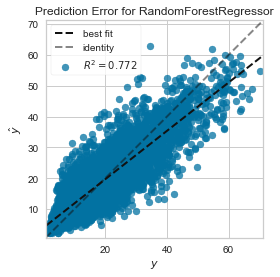

Wall time: 32min 27s


,Algorithm,Year,N Features,Test-Train Ratio,MSE,MAE,R2,MEAE,ME
0,Random Forest,2015-2019,8,0.3,23.863149,3.573013,0.774796,2.677701,35.332159


In [35]:
%%time
RandomForest('Random Forest', TotalYears, '2015-2019', 0, 0, 8, 0.3, 'Yes')

# Gradient Boosting
Function with preprocess built into it

In [59]:
%%time
def GradientBoosting(Name, N_Year, N, printCV, printgraph, N_Features, Max_Depth, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                           ('reduce_dim', 'passthrough'),
                           ('regresson', GradientBoostingRegressor())])



    N_FEATURES_OPTIONS = [N_Features]
    MAX_DEPTH_OPTIONS = [Max_Depth]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [PCA(iterated_power=7)],
            'reduce_dim__n_components': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        },
        {
            'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
            'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
            'regresson__max_depth': MAX_DEPTH_OPTIONS
        }


    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

    # store the best params and best model for later use
    GB_best_params = search.best_params_
    GB_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = GradientBoostingRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    GB_mse, GB_mae, GB_r2, GB_meae, GB_evs, GB_me = evaluate_model(X_test, y_test, GB_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([GB_mse])
    MAE  = np.array([GB_mae])
    R2   = np.array([GB_r2])
    MEAE = np.array([GB_meae])
    ME   = np.array([GB_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Depth, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Max Depth', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df
    

Wall time: 0 ns


In [32]:
%%time
GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 0, 0, 8, 0.3)

KeyboardInterrupt: 

# ANN
Function with preprocess built into it

In [60]:
%%time
def ANN(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', MLPRegressor ())])



    ALPHA = [0.001, 0.01, 0.1, 1, 10, 100], 
    HIDDEN_LAYER_SIZES = [(6),(11,11),(7,7,7)] 
    SOLVER = ['adam'] 
    ACTIVATION = ['relu','tanh','identity','logistic'] 
    LEARNING_RATE = ['constant','invscaling','adaptive']
    N_FEATURES_OPTIONS = [N_Features]
    MAX_ITER = [500]

    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },

    ]
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    MLP_best_params = search.best_params_
    MLP_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = MLPRegressor()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    MLP_mse, MLP_mae, MLP_r2, MLP_meae, MLP_evs, MLP_me = evaluate_model(X_test, y_test, MLP_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([MLP_mse])
    MAE  = np.array([MLP_mae])
    R2   = np.array([MLP_r2])
    MEAE = np.array([MLP_meae])
    ME   = np.array([MLP_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df
    

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Best CV score = 0.753:
Best parameters:  {'reduce_dim': FactorAnalysis(copy=True, iterated_power=3, max_iter=1000, n_components=8,
               noise_variance_init=None, random_state=0,
               svd_method='randomized', tol=0.01), 'reduce_dim__n_components': 8}


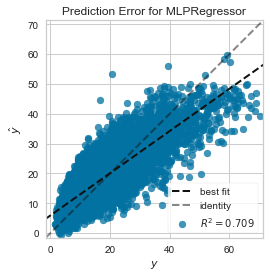

NameError: name 'Depth' is not defined

In [57]:
%%time
ANN('ANN', TotalYears, '2015-2019', 0, 0, 8, 0.3, 'Yes')

# Linear Regression
Function with preprocess built into it

In [61]:
%%time
def LRegress(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
    )
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', LinearRegression())])



    N_FEATURES_OPTIONS = [N_Features]
    NORMALIZE_OPTIONS = [False, True]

    param_grid = [
    {
        'reduce_dim': [PCA(iterated_power=7)],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [RFE(svm.SVR(kernel='linear', gamma='auto')),RFE(LinearRegression())],
        'reduce_dim__n_features_to_select': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [FastICA( algorithm='deflation')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS,
        'regresson__normalize': NORMALIZE_OPTIONS
    },
    {
        'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
        'reduce_dim__n_components': N_FEATURES_OPTIONS
    }
]

    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)


    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    LR_best_params = search.best_params_
    LR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = LinearRegression()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    LR_mse, LR_mae, LR_r2, LR_meae, LR_evs, LR_me = evaluate_model(X_test, y_test, LR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([LR_mse])
    MAE  = np.array([LR_mae])
    R2   = np.array([LR_r2])
    MEAE = np.array([LR_meae])
    ME   = np.array([LR_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df

Wall time: 0 ns


Best CV score = 0.610:
Best parameters:  {'reduce_dim': PCA(copy=True, iterated_power=7, n_components=8, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False), 'reduce_dim__n_components': 8, 'regresson__normalize': False}


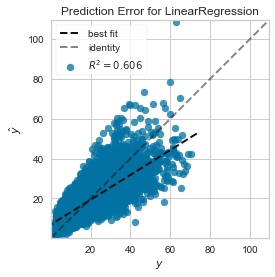

Wall time: 24min 12s


,Algorithm,Year,N Features,Test-Train Split,MSE,MAE,R2,MEAE,ME
0,Linear Regression,2015-2019,8,0.3,40.767813,4.824493,0.612856,3.847653,38.531984


In [36]:
%%time
LRegress('Linear Regression', TotalYears, '2015-2019', 0, 0, 8, 0.3)

# SVM
Function with preprocess built into it

In [62]:
%%time
def SVM(Name, N_Year, N, printCV, printgraph, N_Features, ratio, PM):
    Data = N_Year
    
    names_all = [c for c in Data if c not in ['PM10']]

    # define column groups with the same data preparation
    names_outliers = ['wdsp','temp','rain','Ozone','Hour','wddir','msl']
    names_no_outliers = list(set(names_all) - set(names_outliers))
    
    y = Data['PM10']
    X = Data.drop('PM10', axis=1).values
    
    preprocess_pipeline = make_pipeline(
    AddColumnNames(columns=names_all),
    FeatureUnion(transformer_list=[
        ("outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()
        )),
        ("no_outlier_columns", make_pipeline(
            ColumnSelector(columns=names_outliers),
            FunctionTransformer(np.log, validate=True),
            RobustScaler()  
        ))
    ])
)
   
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ratio, shuffle=True)
    
    pipe = Pipeline(steps=[('preprocess', preprocess_pipeline), 
                       ('reduce_dim', 'passthrough'),
                       ('regresson', SVR())])



    KERNEL = ['linear']
    C = [300]
    GAMMA = ['auto']
    N_FEATURES_OPTIONS = [N_Features]


    param_grid = [
         {
            'reduce_dim': [TruncatedSVD(algorithm='randomized'), TruncatedSVD(algorithm='arpack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        },
        {
            'reduce_dim': [FactorAnalysis(svd_method='randomized'), FactorAnalysis(svd_method='lapack')],
            'reduce_dim__n_components': N_FEATURES_OPTIONS
        }
    ]
    
    search = GridSearchCV(pipe, param_grid, n_jobs=-1, cv=10, iid=False, refit=True)
    search.fit(X_train, y_train)
    

    
    if printCV == 0:
        print("Best CV score = %0.3f:" % search.best_score_)
        print("Best parameters: ", search.best_params_)

     # store the best params and best model for later use
    SVR_best_params = search.best_params_
    SVR_best_model = search.best_estimator_
    
    if printgraph == 0:
        model = SVR()
        visualizer = PredictionError(model)

        visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
        visualizer.score(X_test, y_test)  # Evaluate the model on the test data
        visualizer.show()                 # Finalize and render the figure

    SVR_mse, SVR_mae, SVR_r2, SVR_meae, SVR_evs, SVR_me = evaluate_model(X_test, y_test, SVR_best_model)
    
    Title = np.array([Name])
    Range = np.array([N])
    Features = np.array([N_Features])
    #Depth = np.array([Max_Depth])
    Split = np.array([ratio])
    PM_70 = np.array([PM])
    MSE  = np.array([SVR_mse])
    MAE  = np.array([SVR_mae])
    R2   = np.array([SVR_r2])
    MEAE = np.array([SVR_meae])
    ME   = np.array([SVR_me])
    
    
    df = pd.DataFrame(list(zip(Title, Range, Features, Split, PM_70, MSE, MAE, R2, MEAE, ME)), columns =['Algorithm', 'Year', 'N Features', 'Test-Train Split', 'PM10 > 70 Removed', 'MSE', 'MAE', 'R2', 'MEAE', 'ME'])
    
    return df

Wall time: 0 ns


C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best CV score = 0.729:
Best parameters:  {'reduce_dim': TruncatedSVD(algorithm='arpack', n_components=8, n_iter=5, random_state=None,
             tol=0.0), 'reduce_dim__n_components': 8}


C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


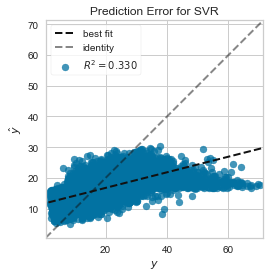

Wall time: 5min 49s


,Algorithm,Year,N Features,Test-Train Split,MSE,MAE,R2,MEAE,ME
0,SVM,2015-2019,8,0.3,29.249668,3.842697,0.730376,2.707766,42.755162


In [38]:
%%time
SVM('SVM', TotalYears, '2015-2019', 0, 0, 8, 0.3)

# Run Permutations of each Algorithm to Identify most optimised Algorithm

In [63]:
%%time
RF_6_12_NO = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 6, 12, 0.7, 'NO')

Wall time: 9min 47s


In [64]:
%%time
RF_7_12_NO = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 7, 12, 0.7, 'NO')

Wall time: 9min 37s


In [65]:
%%time
RF_7_12_NO_5 = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 7, 12, 0.5, 'NO')

Wall time: 22min 6s


In [66]:
%%time
RF_7_12_NO_3 = RandomForest('Random Forest', TotalYears, '2015-2019', 1, 1, 7, 12, 0.3, 'NO')

Wall time: 38min 48s


In [67]:
%%time
RF_7_12_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 7, 12, 0.3, 'YES')

Wall time: 38min 49s


In [68]:
%%time
RF_7_14_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 7, 14, 0.3, 'YES')

Wall time: 40min 25s


In [69]:
%%time
RF_7_16_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 7, 16, 0.3, 'YES')

Wall time: 41min 13s


In [70]:
%%time
RF_7_18_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 7, 18, 0.3, 'YES')

Wall time: 39min 54s


In [71]:
%%time
RF_7_20_YES_3 = RandomForest('Random Forest', TotalYearsPM, '2015-2019', 1, 1, 7, 20, 0.3, 'YES')

Wall time: 40min 11s


In [111]:
# Gather Algorithm statistics
RFTime = ['9m 47s', '9m 37s', '22m 6s', '38m 48s', '38m 49s', '40m 25s', '41m 13s', '39m 54s', '40m 11s']

RFData = pd.concat([RF_6_12_NO, RF_7_12_NO, RF_7_12_NO_5, RF_7_12_NO_3, RF_7_12_YES_3, RF_7_14_YES_3, RF_7_16_YES_3, RF_7_18_YES_3, RF_7_20_YES_3])
RFData['Run Time'] = RFTime
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(RFData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Random Forest,2015-2019,6,12,0.7,NO,79.958,6.256,0.337,4.803,141.276,9m 47s
0,Random Forest,2015-2019,7,12,0.7,NO,79.691,6.240,0.343,4.770,139.058,9m 37s
0,Random Forest,2015-2019,7,12,0.5,NO,72.712,5.977,0.392,4.533,131.591,22m 6s
0,Random Forest,2015-2019,7,12,0.3,NO,65.667,5.701,0.421,4.351,101.897,38m 48s
0,Random Forest,2015-2019,7,12,0.3,YES,58.419,5.576,0.462,4.251,51.853,38m 49s
0,Random Forest,2015-2019,7,14,0.3,YES,59.750,5.654,0.451,4.339,54.284,40m 25s
0,Random Forest,2015-2019,7,16,0.3,YES,58.764,5.623,0.450,4.317,51.433,41m 13s
0,Random Forest,2015-2019,7,18,0.3,YES,57.139,5.475,0.471,4.193,51.750,39m 54s
0,Random Forest,2015-2019,7,20,0.3,YES,56.987,5.555,0.465,4.284,53.019,40m 11s


In [72]:
%%time
GB_6_12_NO = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 6, 12, 0.7, 'NO')

Wall time: 4min 23s


In [73]:
%%time
GB_7_12_NO = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 7, 12, 0.7, 'NO')

Wall time: 4min 1s


In [74]:
%%time
GB_7_12_NO_5 = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 7, 12, 0.5, 'NO')

Wall time: 10min 55s


In [75]:
%%time
GB_7_12_NO_3 = GradientBoosting('Gradient Boosting', TotalYears, '2015-2019', 1, 1, 7, 12, 0.3, 'NO')

Wall time: 3h 29min 50s


In [96]:
%%time
GB_7_12_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 7, 12, 0.3, 'YES')

Wall time: 15min 45s


In [97]:
%%time
GB_7_14_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 7, 14, 0.3, 'YES')

Wall time: 17min 51s


In [98]:
%%time
GB_7_16_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 7, 16, 0.3, 'YES')

Wall time: 21min 39s


In [99]:
%%time
GB_7_18_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 7, 18, 0.3, 'YES')

Wall time: 27min 16s


In [100]:
%%time
GB_7_20_YES_3 = GradientBoosting('Gradient Boosting', TotalYearsPM, '2015-2019', 1, 1, 7, 20, 0.3, 'YES')

Wall time: 32min 23s


In [112]:
# Gather Algorithm statistics
GBTime = ['4m 23s', '4m 1s', '10m 55s', '13m 48s', '15m 45s', '17m 51s', '21m 39s', '27m 16s', '32m 23s']

GBData = pd.concat([GB_6_12_NO, GB_7_12_NO, GB_7_12_NO_5, GB_7_12_NO_3, GB_7_12_YES_3, GB_7_14_YES_3, GB_7_16_YES_3, GB_7_18_YES_3, GB_7_20_YES_3])
GBData['Run Time'] = GBTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(GBData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Gradient Boosting,2015-2019,6,12,0.7,NO,85.446,6.449,0.295,4.812,142.069,4m 23s
0,Gradient Boosting,2015-2019,7,12,0.7,NO,81.783,6.303,0.321,4.714,133.198,4m 1s
0,Gradient Boosting,2015-2019,7,12,0.5,NO,76.125,6.122,0.353,4.557,137.513,10m 55s
0,Gradient Boosting,2015-2019,7,12,0.3,NO,76.391,5.999,0.374,4.417,134.334,13m 48s
0,Gradient Boosting,2015-2019,7,12,0.3,YES,63.027,5.742,0.414,4.331,53.904,15m 45s
0,Gradient Boosting,2015-2019,7,14,0.3,YES,61.735,5.670,0.424,4.233,47.240,17m 51s
0,Gradient Boosting,2015-2019,7,16,0.3,YES,63.634,5.719,0.408,4.248,54.565,21m 39s
0,Gradient Boosting,2015-2019,7,18,0.3,YES,66.995,5.793,0.367,4.143,61.623,27m 16s
0,Gradient Boosting,2015-2019,7,20,0.3,YES,75.027,6.530,0.291,5.323,51.132,32m 23s


In [101]:
%%time
MLP_6_7 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 6, 0.7, 'NO')

Wall time: 1min 21s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [102]:
%%time
MLP_7_7 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 7, 0.7, 'NO')

Wall time: 1min 25s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [103]:
%%time
MLP_7_5 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 7, 0.5, 'NO')

Wall time: 2min 19s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [104]:
%%time
MLP_7_3 = ANN('ANN', TotalYears, '2015-2019', 1, 1, 7, 0.3, 'NO')

Wall time: 3min 24s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [105]:
%%time
MLP_7_3_YES = ANN('ANN', TotalYearsPM, '2015-2019', 1, 1, 7, 0.3, 'YES')

Wall time: 3min 21s


C:\Users\User\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [113]:
# Gather Algorithm statistics
MLPTime = ['1m 21s', '1m 25s', '2m 19s', '3m 24s', '3m 21s']

MLPData = pd.concat([MLP_6_7, MLP_7_7, MLP_7_5, MLP_7_3, MLP_7_3_YES])
MLPData['Run Time'] = MLPTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(MLPData)

,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,ANN,2015-2019,6,0.7,NO,83.498,6.490,0.303,5.042,134.388,1m 21s
0,ANN,2015-2019,7,0.7,NO,80.816,6.447,0.314,5.013,131.058,1m 25s
0,ANN,2015-2019,7,0.5,NO,80.293,6.412,0.325,5.039,131.091,2m 19s
0,ANN,2015-2019,7,0.3,NO,85.629,6.446,0.318,4.971,132.353,3m 24s
0,ANN,2015-2019,7,0.3,YES,70.325,6.172,0.351,4.795,52.917,3m 21s


In [106]:
%%time
LR_6_7 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 6, 0.7, 'NO')

Wall time: 3min 54s


In [107]:
%%time
LR_7_7 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 7, 0.7, 'NO')

Wall time: 3min 26s


In [108]:
%%time
LR_7_5 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 7, 0.5, 'NO')

Wall time: 11min 2s


In [109]:
%%time
LR_7_3 = LRegress('Linear Regression', TotalYears, '2015-2019', 1, 1, 7, 0.3, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 23min 22s


In [110]:
%%time
LP_7_3_YES = LRegress('Linear Regression', TotalYearsPM, '2015-2019', 1, 1, 7, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


Wall time: 21min 33s


In [114]:
# Gather Algorithm statistics
LRTime = ['3m 54s', '3m 26s', '11m 2s', '23m 22s', '21m 33s']

LRData = pd.concat([LR_6_7, LR_7_7, LR_7_5, LR_7_3, LP_7_3_YES])
LRData['Run Time'] = LRTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(LRData)

,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Linear Regression,2015-2019,6,0.7,NO,97.386,7.201,0.177,5.855,130.292,3m 54s
0,Linear Regression,2015-2019,7,0.7,NO,97.348,7.172,0.175,5.811,143.490,3m 26s
0,Linear Regression,2015-2019,7,0.5,NO,101.539,7.250,0.174,5.806,134.278,11m 2s
0,Linear Regression,2015-2019,7,0.3,NO,96.753,7.167,0.186,5.821,104.210,23m 22s
0,Linear Regression,2015-2019,7,0.3,YES,84.703,6.958,0.193,5.754,60.466,21m 33s


In [91]:
%%time
SVM_6_7 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 6, 0.7, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 1min 15s


In [92]:
%%time
SVM_7_7 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 7, 0.7, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 1min 11s


In [93]:
%%time
SVM_7_5 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 7, 0.5, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 3min 26s


In [94]:
%%time
SVM_7_3 = SVM('SVM', TotalYears, '2015-2019', 1, 1, 7, 0.3, 'NO')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 6min 57s


In [95]:
%%time
SVM_7_3_YES = SVM('SVM', TotalYearsPM, '2015-2019', 1, 1, 7, 0.3, 'YES')

C:\Users\User\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
C:\Users\User\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Wall time: 7min 21s


In [115]:
# Gather Algorithm statistics
SVMTime = ['1m 15s', '1m 11s', '3m 26s', '6m 57s', '7m 21s']

SVMData = pd.concat([SVM_6_7, SVM_7_7, SVM_7_5, SVM_7_3, SVM_7_3_YES])
SVMData['Run Time'] = SVMTime 
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', 1000)
pd.set_option('display.colheader_justify', 'center')
pd.set_option('display.precision', 3)

display(SVMData)

,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,SVM,2015-2019,6,0.7,NO,88.142,6.335,0.255,4.579,139.342,1m 15s
0,SVM,2015-2019,7,0.7,NO,89.909,6.343,0.250,4.504,139.913,1m 11s
0,SVM,2015-2019,7,0.5,NO,87.121,6.281,0.270,4.487,137.138,3m 26s
0,SVM,2015-2019,7,0.3,NO,87.246,6.328,0.267,4.496,109.315,6m 57s
0,SVM,2015-2019,7,0.3,YES,75.633,6.139,0.294,4.500,55.747,7m 21s


# Display Tables of Statistics

In [116]:
# Check that they all look reasonable
display(RFData)
display(GBData)
display(MLPData)
display(LRData)
display(SVMData)

,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Random Forest,2015-2019,6,12,0.7,NO,79.958,6.256,0.337,4.803,141.276,9m 47s
0,Random Forest,2015-2019,7,12,0.7,NO,79.691,6.240,0.343,4.770,139.058,9m 37s
0,Random Forest,2015-2019,7,12,0.5,NO,72.712,5.977,0.392,4.533,131.591,22m 6s
0,Random Forest,2015-2019,7,12,0.3,NO,65.667,5.701,0.421,4.351,101.897,38m 48s
0,Random Forest,2015-2019,7,12,0.3,YES,58.419,5.576,0.462,4.251,51.853,38m 49s
0,Random Forest,2015-2019,7,14,0.3,YES,59.750,5.654,0.451,4.339,54.284,40m 25s
0,Random Forest,2015-2019,7,16,0.3,YES,58.764,5.623,0.450,4.317,51.433,41m 13s
0,Random Forest,2015-2019,7,18,0.3,YES,57.139,5.475,0.471,4.193,51.750,39m 54s
0,Random Forest,2015-2019,7,20,0.3,YES,56.987,5.555,0.465,4.284,53.019,40m 11s


,Algorithm,Year,N Features,Max Depth,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Gradient Boosting,2015-2019,6,12,0.7,NO,85.446,6.449,0.295,4.812,142.069,4m 23s
0,Gradient Boosting,2015-2019,7,12,0.7,NO,81.783,6.303,0.321,4.714,133.198,4m 1s
0,Gradient Boosting,2015-2019,7,12,0.5,NO,76.125,6.122,0.353,4.557,137.513,10m 55s
0,Gradient Boosting,2015-2019,7,12,0.3,NO,76.391,5.999,0.374,4.417,134.334,13m 48s
0,Gradient Boosting,2015-2019,7,12,0.3,YES,63.027,5.742,0.414,4.331,53.904,15m 45s
0,Gradient Boosting,2015-2019,7,14,0.3,YES,61.735,5.670,0.424,4.233,47.240,17m 51s
0,Gradient Boosting,2015-2019,7,16,0.3,YES,63.634,5.719,0.408,4.248,54.565,21m 39s
0,Gradient Boosting,2015-2019,7,18,0.3,YES,66.995,5.793,0.367,4.143,61.623,27m 16s
0,Gradient Boosting,2015-2019,7,20,0.3,YES,75.027,6.530,0.291,5.323,51.132,32m 23s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,ANN,2015-2019,6,0.7,NO,83.498,6.490,0.303,5.042,134.388,1m 21s
0,ANN,2015-2019,7,0.7,NO,80.816,6.447,0.314,5.013,131.058,1m 25s
0,ANN,2015-2019,7,0.5,NO,80.293,6.412,0.325,5.039,131.091,2m 19s
0,ANN,2015-2019,7,0.3,NO,85.629,6.446,0.318,4.971,132.353,3m 24s
0,ANN,2015-2019,7,0.3,YES,70.325,6.172,0.351,4.795,52.917,3m 21s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,Linear Regression,2015-2019,6,0.7,NO,97.386,7.201,0.177,5.855,130.292,3m 54s
0,Linear Regression,2015-2019,7,0.7,NO,97.348,7.172,0.175,5.811,143.490,3m 26s
0,Linear Regression,2015-2019,7,0.5,NO,101.539,7.250,0.174,5.806,134.278,11m 2s
0,Linear Regression,2015-2019,7,0.3,NO,96.753,7.167,0.186,5.821,104.210,23m 22s
0,Linear Regression,2015-2019,7,0.3,YES,84.703,6.958,0.193,5.754,60.466,21m 33s


,Algorithm,Year,N Features,Test-Train Split,PM10 > 70 Removed,MSE,MAE,R2,MEAE,ME,Run Time
0,SVM,2015-2019,6,0.7,NO,88.142,6.335,0.255,4.579,139.342,1m 15s
0,SVM,2015-2019,7,0.7,NO,89.909,6.343,0.250,4.504,139.913,1m 11s
0,SVM,2015-2019,7,0.5,NO,87.121,6.281,0.270,4.487,137.138,3m 26s
0,SVM,2015-2019,7,0.3,NO,87.246,6.328,0.267,4.496,109.315,6m 57s
0,SVM,2015-2019,7,0.3,YES,75.633,6.139,0.294,4.500,55.747,7m 21s


In [117]:
# Combine all Algorithm statistics into one dataframe
PM25excData = pd.concat([RFData, GBData, MLPData, LRData, SVMData])
display(PM25excData)

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,6.256,141.276,4.803,79.958,12.0,6,NO,0.337,9m 47s,0.7,2015-2019
0,Random Forest,6.240,139.058,4.770,79.691,12.0,7,NO,0.343,9m 37s,0.7,2015-2019
0,Random Forest,5.977,131.591,4.533,72.712,12.0,7,NO,0.392,22m 6s,0.5,2015-2019
0,Random Forest,5.701,101.897,4.351,65.667,12.0,7,NO,0.421,38m 48s,0.3,2015-2019
0,Random Forest,5.576,51.853,4.251,58.419,12.0,7,YES,0.462,38m 49s,0.3,2015-2019
0,Random Forest,5.654,54.284,4.339,59.750,14.0,7,YES,0.451,40m 25s,0.3,2015-2019
0,Random Forest,5.623,51.433,4.317,58.764,16.0,7,YES,0.450,41m 13s,0.3,2015-2019
0,Random Forest,5.475,51.750,4.193,57.139,18.0,7,YES,0.471,39m 54s,0.3,2015-2019
0,Random Forest,5.555,53.019,4.284,56.987,20.0,7,YES,0.465,40m 11s,0.3,2015-2019
0,Gradient Boosting,6.449,142.069,4.812,85.446,12.0,6,NO,0.295,4m 23s,0.7,2015-2019


In [118]:
# Create CSV of Results
PM25excData.to_csv('PM10_Prediction_Results_excluding_PM25', index=False)

In [119]:
PM25incData = pd.read_csv('PM10_Prediction_Results_including_PM25', thousands=',', low_memory=False)

# Function to Separate results into each specific Algorithm

In [120]:
def AlgorithmTable(Data, Name):
    Dataf = Data
    
    Dataf = Dataf[Data['Algorithm'] == Name]
    
    return Dataf
                  
RFPM25 = AlgorithmTable(PM25incData, 'Random Forest')
RF     = AlgorithmTable(PM25excData, 'Random Forest')

print('Including PM2.5')
display(RFPM25)
print()
print('Excluding PM2.5')
display(RF)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,4.015,69.833,2.881,32.944,12.0,6,NO,0.722,11m 58s,0.7,2015-2019
1,Random Forest,4.042,102.497,3.047,33.314,12.0,7,NO,0.722,11m 38s,0.7,2015-2019
2,Random Forest,3.992,117.944,2.985,32.862,12.0,8,NO,0.728,12m 27s,0.7,2015-2019
3,Random Forest,3.854,101.729,2.821,30.801,12.0,8,NO,0.741,25m 48s,0.5,2015-2019
4,Random Forest,3.700,110.138,2.726,28.683,12.0,8,NO,0.765,48m 22s,0.3,2015-2019
5,Random Forest,3.662,40.337,2.728,25.539,12.0,8,YES,0.766,48m 1s,0.3,2015-2019
6,Random Forest,3.637,37.271,2.714,25.126,14.0,8,YES,0.768,48m 33s,0.3,2015-2019
7,Random Forest,3.597,35.827,2.663,24.740,16.0,8,YES,0.770,48m 50s,0.3,2015-2019
8,Random Forest,3.541,40.291,2.619,24.207,18.0,8,YES,0.772,1h 38m 13s,0.3,2015-2019
9,Random Forest,3.569,39.435,2.654,24.170,20.0,8,YES,0.769,1h 38m 10s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,6.256,141.276,4.803,79.958,12.0,6,NO,0.337,9m 47s,0.7,2015-2019
0,Random Forest,6.240,139.058,4.770,79.691,12.0,7,NO,0.343,9m 37s,0.7,2015-2019
0,Random Forest,5.977,131.591,4.533,72.712,12.0,7,NO,0.392,22m 6s,0.5,2015-2019
0,Random Forest,5.701,101.897,4.351,65.667,12.0,7,NO,0.421,38m 48s,0.3,2015-2019
0,Random Forest,5.576,51.853,4.251,58.419,12.0,7,YES,0.462,38m 49s,0.3,2015-2019
0,Random Forest,5.654,54.284,4.339,59.750,14.0,7,YES,0.451,40m 25s,0.3,2015-2019
0,Random Forest,5.623,51.433,4.317,58.764,16.0,7,YES,0.450,41m 13s,0.3,2015-2019
0,Random Forest,5.475,51.750,4.193,57.139,18.0,7,YES,0.471,39m 54s,0.3,2015-2019
0,Random Forest,5.555,53.019,4.284,56.987,20.0,7,YES,0.465,40m 11s,0.3,2015-2019


In [121]:
GBPM25 = AlgorithmTable(PM25incData, 'Gradient Boosting')
GB     = AlgorithmTable(PM25excData, 'Gradient Boosting')

print('Including PM2.5')
display(GBPM25)
print()
print('Excluding PM2.5')
display(GB)


Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
10,Gradient Boosting,4.161,93.935,2.922,36.888,12.0,6,NO,0.690,3m 38s,0.7,2015-2019
11,Gradient Boosting,4.129,92.646,2.957,36.385,12.0,7,NO,0.696,3m 5s,0.7,2015-2019
12,Gradient Boosting,4.049,90.867,2.928,34.970,12.0,8,NO,0.712,3m 8s,0.7,2015-2019
13,Gradient Boosting,3.698,75.919,2.707,28.112,12.0,8,NO,0.759,8m 57s,0.5,2015-2019
14,Gradient Boosting,3.612,50.205,2.648,25.986,12.0,8,NO,0.782,17m 11s,0.3,2015-2019
15,Gradient Boosting,3.601,39.862,2.643,25.356,12.0,8,YES,0.769,17m 15s,0.3,2015-2019
16,Gradient Boosting,3.559,36.793,2.647,23.963,14.0,8,YES,0.768,21m 16s,0.3,2015-2019
17,Gradient Boosting,3.662,40.525,2.658,26.370,16.0,8,YES,0.749,28m 53s,0.3,2015-2019
18,Gradient Boosting,3.944,44.795,2.735,32.532,18.0,8,YES,0.687,41m 50s,0.3,2015-2019
19,Gradient Boosting,4.209,37.325,3.227,31.880,20.0,8,YES,0.687,49m 1s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Gradient Boosting,6.449,142.069,4.812,85.446,12.0,6,NO,0.295,4m 23s,0.7,2015-2019
0,Gradient Boosting,6.303,133.198,4.714,81.783,12.0,7,NO,0.321,4m 1s,0.7,2015-2019
0,Gradient Boosting,6.122,137.513,4.557,76.125,12.0,7,NO,0.353,10m 55s,0.5,2015-2019
0,Gradient Boosting,5.999,134.334,4.417,76.391,12.0,7,NO,0.374,13m 48s,0.3,2015-2019
0,Gradient Boosting,5.742,53.904,4.331,63.027,12.0,7,YES,0.414,15m 45s,0.3,2015-2019
0,Gradient Boosting,5.670,47.240,4.233,61.735,14.0,7,YES,0.424,17m 51s,0.3,2015-2019
0,Gradient Boosting,5.719,54.565,4.248,63.634,16.0,7,YES,0.408,21m 39s,0.3,2015-2019
0,Gradient Boosting,5.793,61.623,4.143,66.995,18.0,7,YES,0.367,27m 16s,0.3,2015-2019
0,Gradient Boosting,6.530,51.132,5.323,75.027,20.0,7,YES,0.291,32m 23s,0.3,2015-2019


In [122]:
MLPPM25 = AlgorithmTable(PM25incData, 'ANN')
MLP     = AlgorithmTable(PM25excData, 'ANN')

print('Including PM2.5')
display(MLPPM25)
print()
print('Excluding PM2.5')
display(MLP)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
20,ANN,4.529,96.488,3.365,40.708,NaN,6,NO,0.652,1m 12s,0.7,2015-2019
21,ANN,3.991,85.455,2.974,31.084,NaN,7,NO,0.739,1m 11s,0.7,2015-2019
22,ANN,3.956,90.318,2.955,31.286,NaN,8,NO,0.740,1m 13s,0.7,2015-2019
23,ANN,3.900,80.842,2.891,30.592,NaN,8,NO,0.749,2m 2s,0.5,2015-2019
24,ANN,3.820,83.062,2.825,29.117,NaN,8,NO,0.748,2m 56s,0.3,2015-2019
25,ANN,3.802,35.444,2.871,27.012,NaN,8,YES,0.752,2m 55s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,ANN,6.490,134.388,5.042,83.498,NaN,6,NO,0.303,1m 21s,0.7,2015-2019
0,ANN,6.447,131.058,5.013,80.816,NaN,7,NO,0.314,1m 25s,0.7,2015-2019
0,ANN,6.412,131.091,5.039,80.293,NaN,7,NO,0.325,2m 19s,0.5,2015-2019
0,ANN,6.446,132.353,4.971,85.629,NaN,7,NO,0.318,3m 24s,0.3,2015-2019
0,ANN,6.172,52.917,4.795,70.325,NaN,7,YES,0.351,3m 21s,0.3,2015-2019


In [123]:
LRPM25 = AlgorithmTable(PM25incData, 'Linear Regression')
LR     = AlgorithmTable(PM25excData, 'Linear Regression')

print('Including PM2.5')
display(LRPM25)
print()
print('Excluding PM2.5')
display(LR)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
26,Linear Regression,5.264,121.996,4.233,52.470,NaN,6,NO,0.551,4m 40s,0.7,2015-2019
27,Linear Regression,5.251,122.548,4.189,54.418,NaN,7,NO,0.546,4m 2s,0.7,2015-2019
28,Linear Regression,5.268,115.834,4.211,53.413,NaN,8,NO,0.551,4m 4s,0.7,2015-2019
29,Linear Regression,5.252,122.508,4.144,54.687,NaN,8,NO,0.549,11m 42s,0.5,2015-2019
30,Linear Regression,5.245,115.782,4.156,55.107,NaN,8,NO,0.546,24m 18s,0.3,2015-2019
31,Linear Regression,5.090,42.098,4.094,45.371,NaN,8,YES,0.573,24m 34s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Linear Regression,7.201,130.292,5.855,97.386,NaN,6,NO,0.177,3m 54s,0.7,2015-2019
0,Linear Regression,7.172,143.490,5.811,97.348,NaN,7,NO,0.175,3m 26s,0.7,2015-2019
0,Linear Regression,7.250,134.278,5.806,101.539,NaN,7,NO,0.174,11m 2s,0.5,2015-2019
0,Linear Regression,7.167,104.210,5.821,96.753,NaN,7,NO,0.186,23m 22s,0.3,2015-2019
0,Linear Regression,6.958,60.466,5.754,84.703,NaN,7,YES,0.193,21m 33s,0.3,2015-2019


In [124]:
SVMPM25 = AlgorithmTable(PM25incData, 'SVM')
SVM     = AlgorithmTable(PM25excData, 'SVM')

print('Including PM2.5')
display(SVMPM25)
print()
print('Excluding PM2.5')
display(SVM)

Including PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
32,SVM,4.580,115.233,3.309,44.601,NaN,6,NO,0.620,1m 22s,0.7,2015-2019
33,SVM,4.041,121.837,2.854,38.340,NaN,7,NO,0.680,1m 13s,0.7,2015-2019
34,SVM,4.043,120.732,2.834,38.287,NaN,8,NO,0.683,1m 17s,0.7,2015-2019
35,SVM,3.964,115.940,2.761,36.750,NaN,8,NO,0.700,4m 1s,0.5,2015-2019
36,SVM,3.912,114.815,2.711,36.954,NaN,8,NO,0.704,7m 15s,0.3,2015-2019
37,SVM,3.738,40.637,2.686,27.820,NaN,8,YES,0.738,7m 13s,0.3,2015-2019



Excluding PM2.5


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,SVM,6.335,139.342,4.579,88.142,NaN,6,NO,0.255,1m 15s,0.7,2015-2019
0,SVM,6.343,139.913,4.504,89.909,NaN,7,NO,0.250,1m 11s,0.7,2015-2019
0,SVM,6.281,137.138,4.487,87.121,NaN,7,NO,0.270,3m 26s,0.5,2015-2019
0,SVM,6.328,109.315,4.496,87.246,NaN,7,NO,0.267,6m 57s,0.3,2015-2019
0,SVM,6.139,55.747,4.500,75.633,NaN,7,YES,0.294,7m 21s,0.3,2015-2019


# Compare Statistics with PM2.5 Included and Excluded

In [126]:
AlgorithmsPM25 = pd.concat([RFPM25, GBPM25, MLPPM25, LRPM25, SVMPM25])
Algorithms = pd.concat([RF, GB, MLP, LR, SVM])

print("Statistics with PM2.5 included as a feature")
display(AlgorithmsPM25)
print()
print()

print("Statistics with PM2.5 excluded as a feature")
display(Algorithms)

Statistics with PM2.5 included as a feature


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,4.015,69.833,2.881,32.944,12.0,6,NO,0.722,11m 58s,0.7,2015-2019
1,Random Forest,4.042,102.497,3.047,33.314,12.0,7,NO,0.722,11m 38s,0.7,2015-2019
2,Random Forest,3.992,117.944,2.985,32.862,12.0,8,NO,0.728,12m 27s,0.7,2015-2019
3,Random Forest,3.854,101.729,2.821,30.801,12.0,8,NO,0.741,25m 48s,0.5,2015-2019
4,Random Forest,3.700,110.138,2.726,28.683,12.0,8,NO,0.765,48m 22s,0.3,2015-2019
5,Random Forest,3.662,40.337,2.728,25.539,12.0,8,YES,0.766,48m 1s,0.3,2015-2019
6,Random Forest,3.637,37.271,2.714,25.126,14.0,8,YES,0.768,48m 33s,0.3,2015-2019
7,Random Forest,3.597,35.827,2.663,24.740,16.0,8,YES,0.770,48m 50s,0.3,2015-2019
8,Random Forest,3.541,40.291,2.619,24.207,18.0,8,YES,0.772,1h 38m 13s,0.3,2015-2019
9,Random Forest,3.569,39.435,2.654,24.170,20.0,8,YES,0.769,1h 38m 10s,0.3,2015-2019




Statistics with PM2.5 excluded as a feature


,Algorithm,MAE,ME,MEAE,MSE,Max Depth,N Features,PM10 > 70 Removed,R2,Run Time,Test-Train Split,Year
0,Random Forest,6.256,141.276,4.803,79.958,12.0,6,NO,0.337,9m 47s,0.7,2015-2019
0,Random Forest,6.240,139.058,4.770,79.691,12.0,7,NO,0.343,9m 37s,0.7,2015-2019
0,Random Forest,5.977,131.591,4.533,72.712,12.0,7,NO,0.392,22m 6s,0.5,2015-2019
0,Random Forest,5.701,101.897,4.351,65.667,12.0,7,NO,0.421,38m 48s,0.3,2015-2019
0,Random Forest,5.576,51.853,4.251,58.419,12.0,7,YES,0.462,38m 49s,0.3,2015-2019
0,Random Forest,5.654,54.284,4.339,59.750,14.0,7,YES,0.451,40m 25s,0.3,2015-2019
0,Random Forest,5.623,51.433,4.317,58.764,16.0,7,YES,0.450,41m 13s,0.3,2015-2019
0,Random Forest,5.475,51.750,4.193,57.139,18.0,7,YES,0.471,39m 54s,0.3,2015-2019
0,Random Forest,5.555,53.019,4.284,56.987,20.0,7,YES,0.465,40m 11s,0.3,2015-2019
0,Gradient Boosting,6.449,142.069,4.812,85.446,12.0,6,NO,0.295,4m 23s,0.7,2015-2019
